In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv(r'D:\Learnbay\Weekend Project Sunduram sir\Healthcare Domain\parkinsons.csv')

In [4]:
df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [6]:
df.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

In [12]:
df.columns = df.columns.str.replace('(' , '_').str.replace(')' , '').str.replace(':' , '_').str.replace('%' , 'perc')
df.columns

Index(['name', 'MDVP_Fo_Hz', 'MDVP_Fhi_Hz', 'MDVP_Flo_Hz', 'MDVP_Jitter_perc',
       'MDVP_Jitter_Abs', 'MDVP_RAP', 'MDVP_PPQ', 'Jitter_DDP', 'MDVP_Shimmer',
       'MDVP_Shimmer_dB', 'Shimmer_APQ3', 'Shimmer_APQ5', 'MDVP_APQ',
       'Shimmer_DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE'],
      dtype='object')

## Duplicatation of data

In [13]:
df.duplicated().sum()

0

## Null Values (Missing Value Treatment Not required)

In [15]:
df.isnull().sum().sum()

0

## Information

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP_Fo_Hz        195 non-null    float64
 2   MDVP_Fhi_Hz       195 non-null    float64
 3   MDVP_Flo_Hz       195 non-null    float64
 4   MDVP_Jitter_perc  195 non-null    float64
 5   MDVP_Jitter_Abs   195 non-null    float64
 6   MDVP_RAP          195 non-null    float64
 7   MDVP_PPQ          195 non-null    float64
 8   Jitter_DDP        195 non-null    float64
 9   MDVP_Shimmer      195 non-null    float64
 10  MDVP_Shimmer_dB   195 non-null    float64
 11  Shimmer_APQ3      195 non-null    float64
 12  Shimmer_APQ5      195 non-null    float64
 13  MDVP_APQ          195 non-null    float64
 14  Shimmer_DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

### Drop Name variable

In [17]:
df.drop(columns=['name'] , inplace=True)

## Find the Unique Value

In [18]:
for i in df.columns:
    print("*******************          ", i ,"     ********************")
    print(set(df[i]))
    print()

*******************           MDVP_Fo_Hz      ********************
{102.273, 110.568, 110.453, 110.739, 112.239, 112.15, 112.547, 113.4, 113.166, 113.715, 114.238, 114.554, 114.563, 115.322, 115.38, 116.879, 116.15, 116.388, 116.848, 116.286, 117.274, 117.87, 117.963, 117.004, 117.226, 118.747, 119.031, 88.333, 119.056, 119.1, 91.904, 120.078, 120.289, 120.256, 95.056, 95.73, 95.385, 96.106, 95.605, 100.77, 100.96, 98.804, 121.345, 104.4, 122.336, 106.516, 107.332, 108.807, 109.86, 110.793, 110.707, 112.014, 112.876, 114.847, 110.417, 116.676, 116.014, 116.682, 119.992, 120.267, 120.08, 122.188, 122.964, 124.445, 120.552, 122.4, 126.344, 128.001, 129.336, 125.036, 125.791, 126.512, 125.641, 128.451, 128.94, 136.926, 136.969, 136.358, 139.173, 140.341, 139.224, 142.167, 143.533, 144.188, 142.729, 146.845, 138.19, 148.09, 148.272, 150.258, 151.955, 152.845, 153.046, 153.848, 153.88, 156.405, 155.358, 152.125, 157.821, 157.447, 159.116, 162.568, 163.656, 155.078, 158.219, 166.605, 167.93,

## Outlier Check

In [19]:
def distplots(col):
    plt.title(col)
    sns.distplot(df[col])
    plt.tight_layout()
    plt.show()

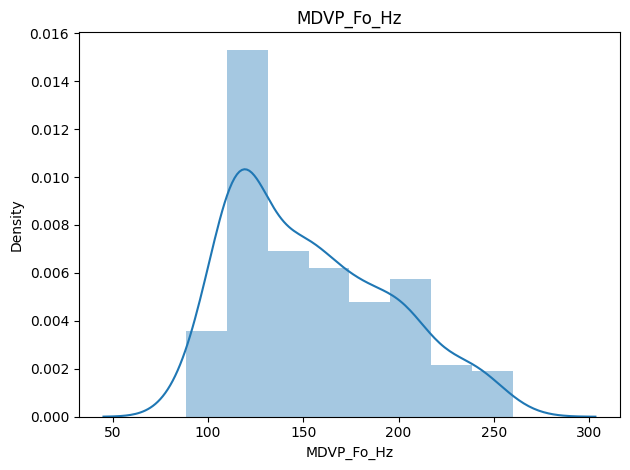

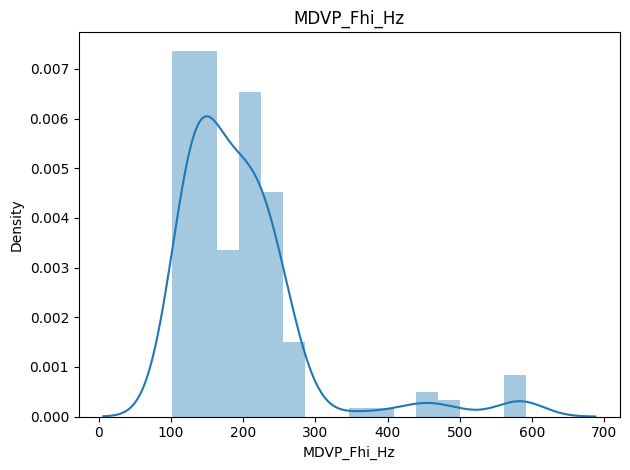

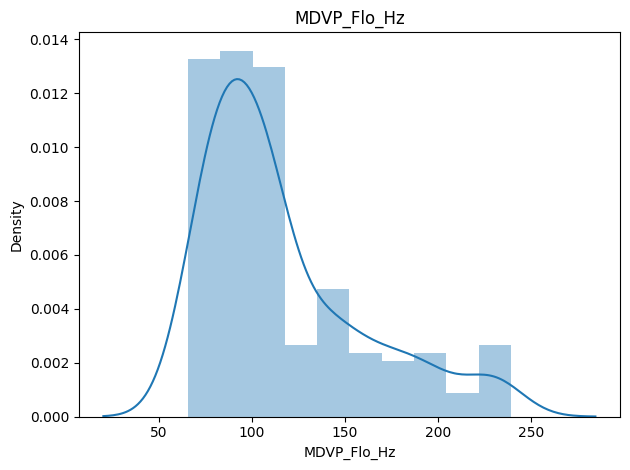

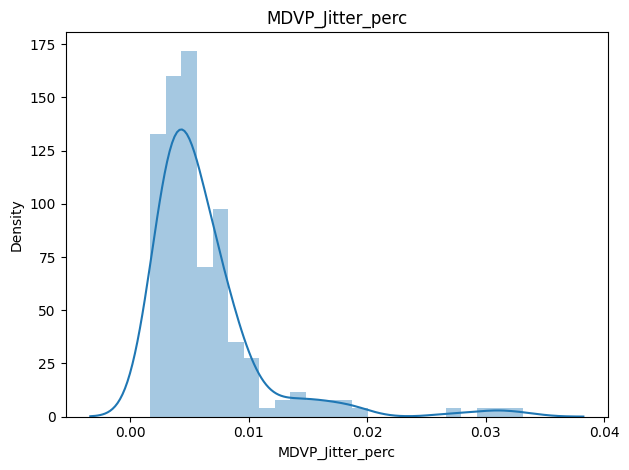

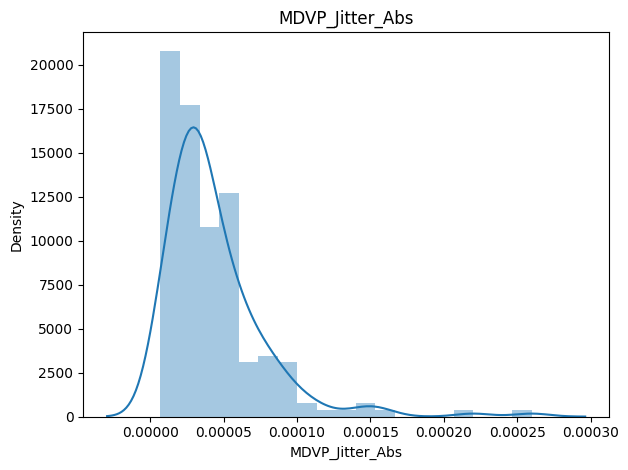

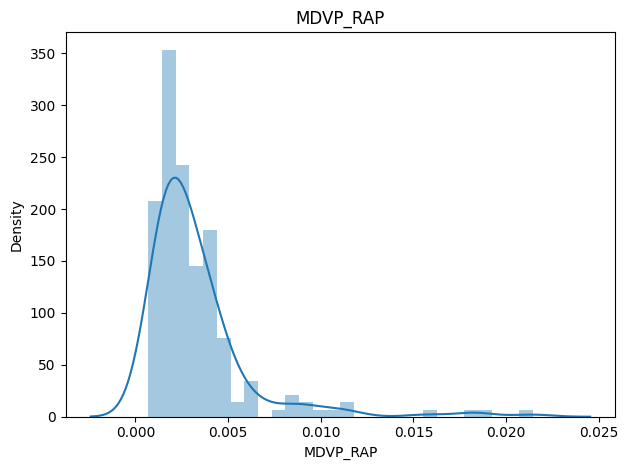

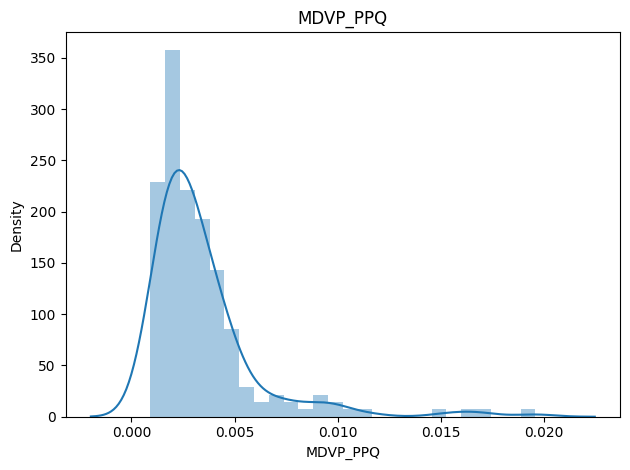

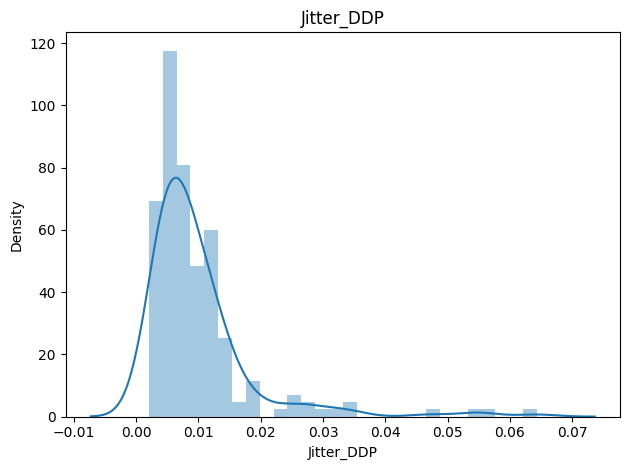

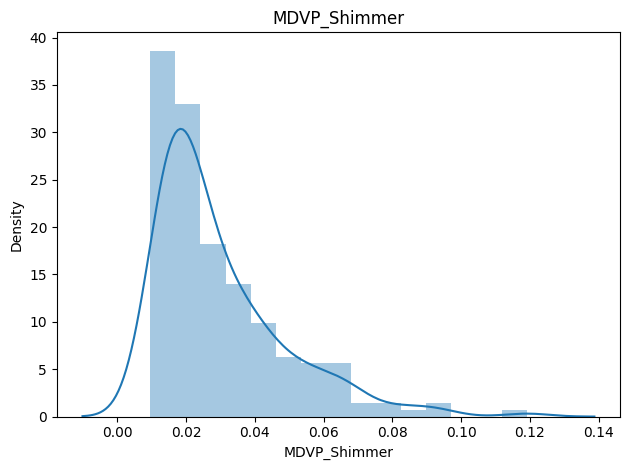

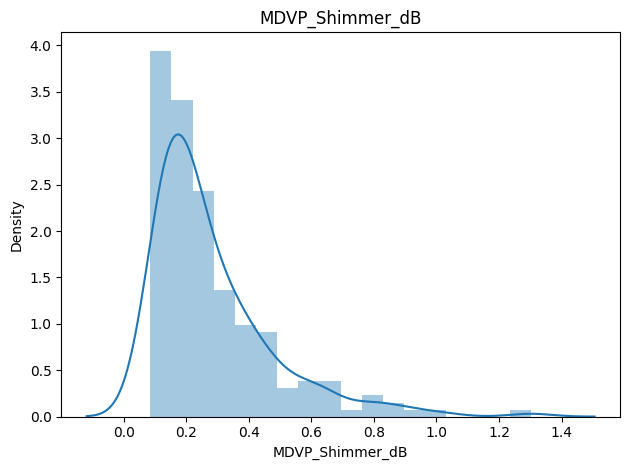

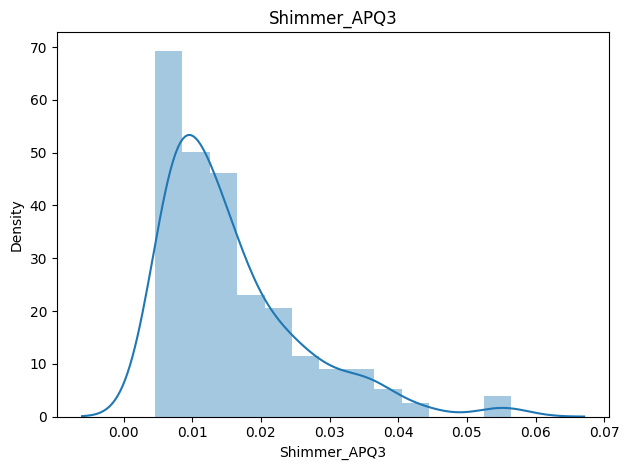

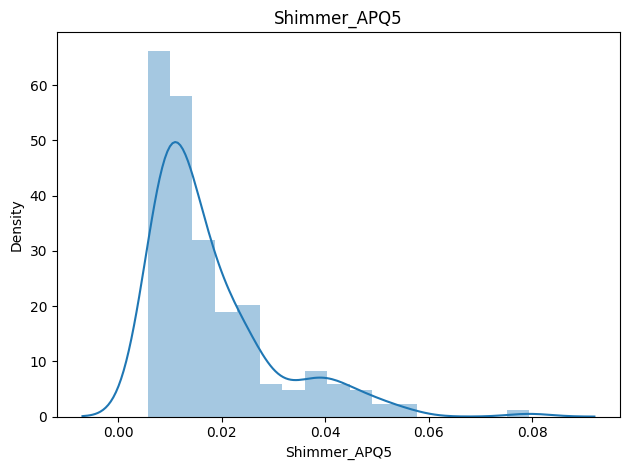

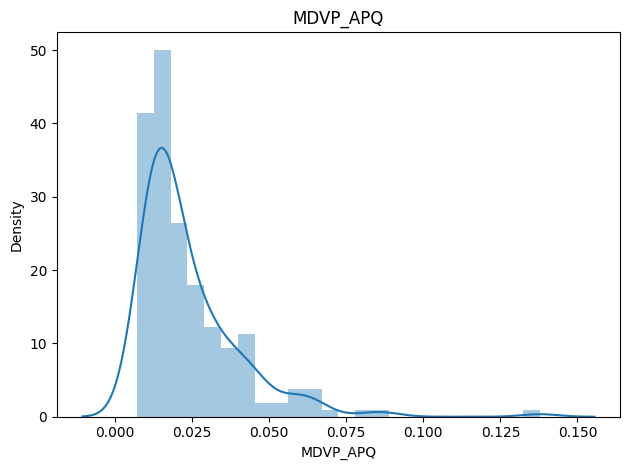

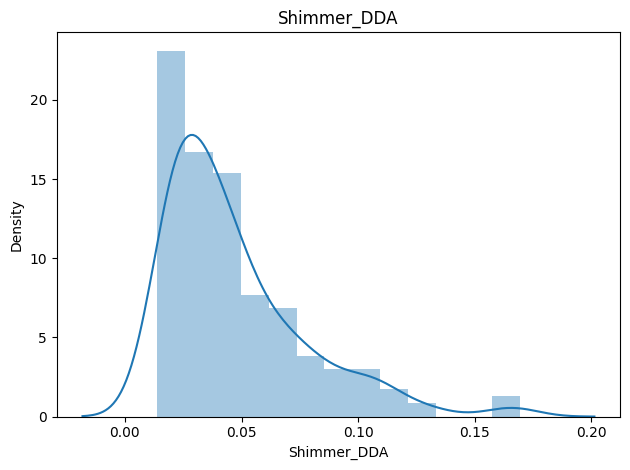

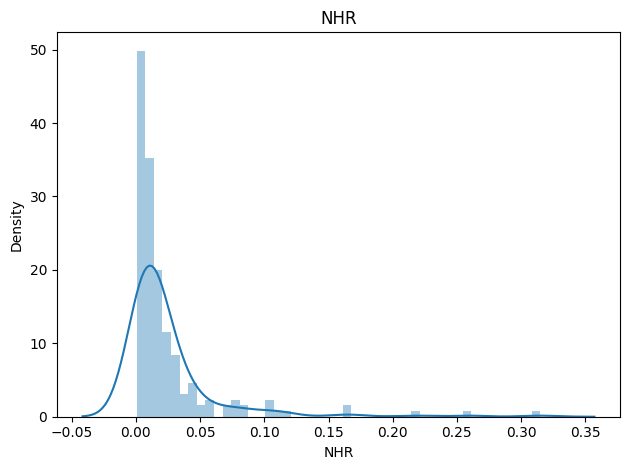

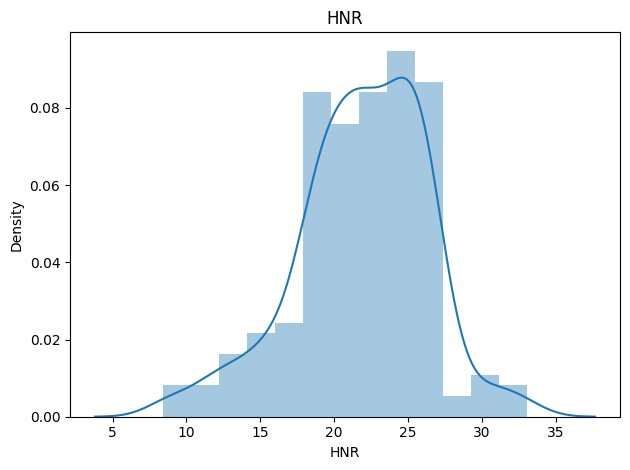

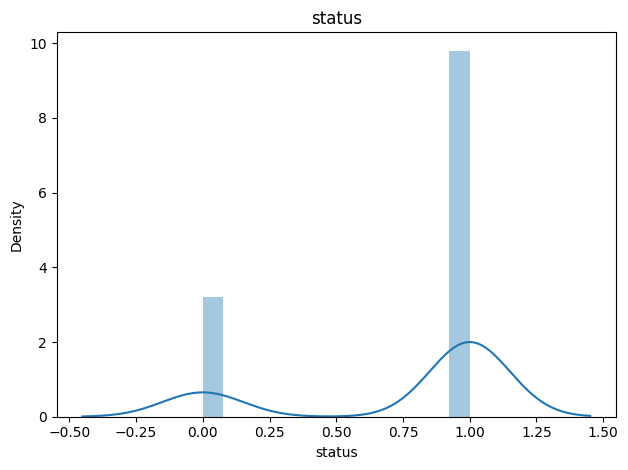

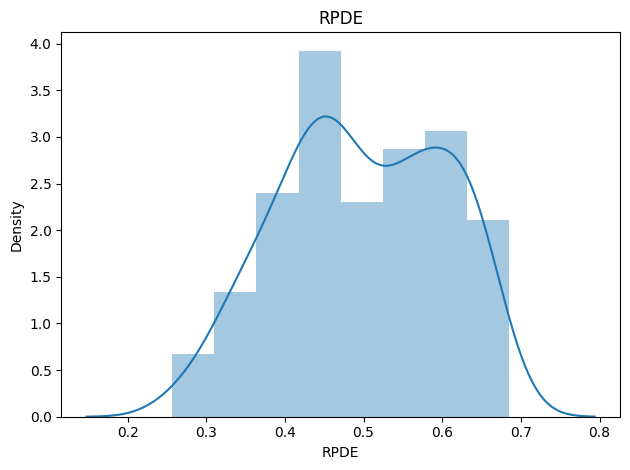

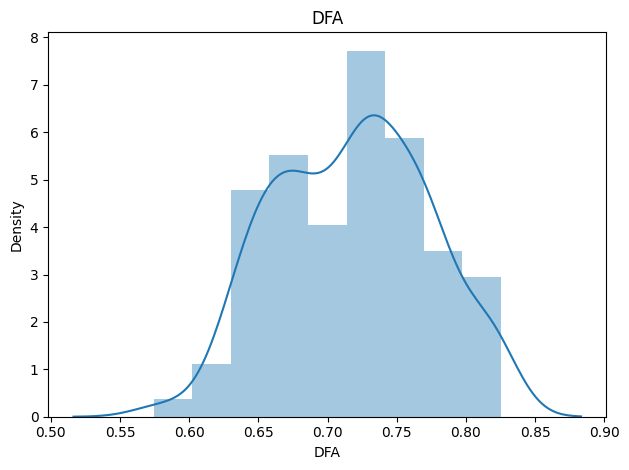

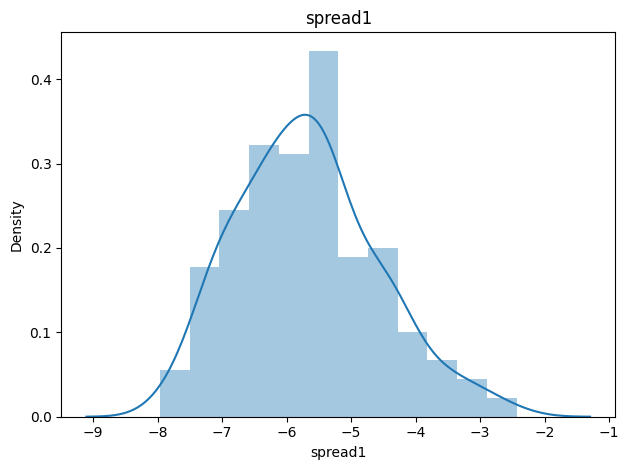

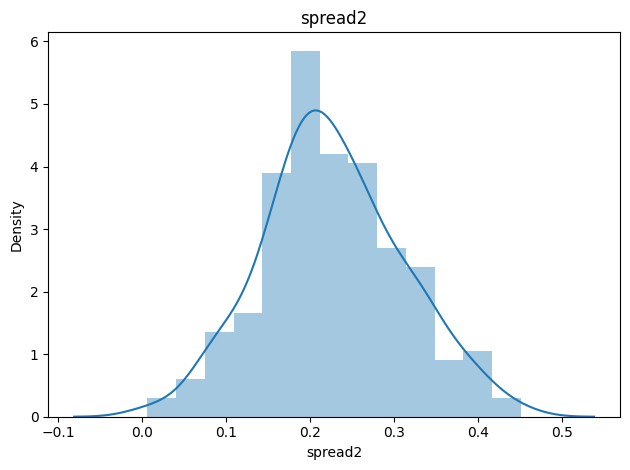

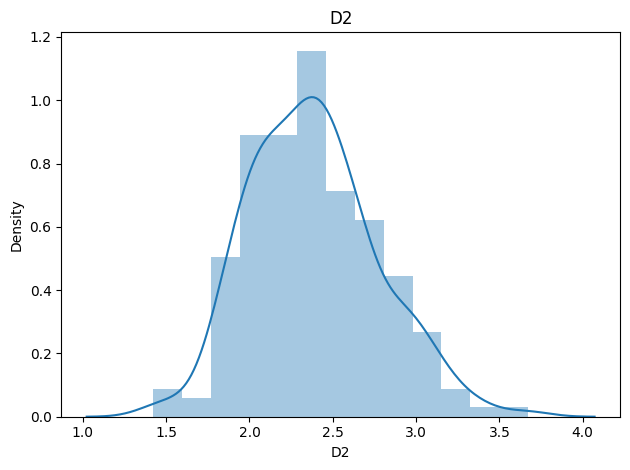

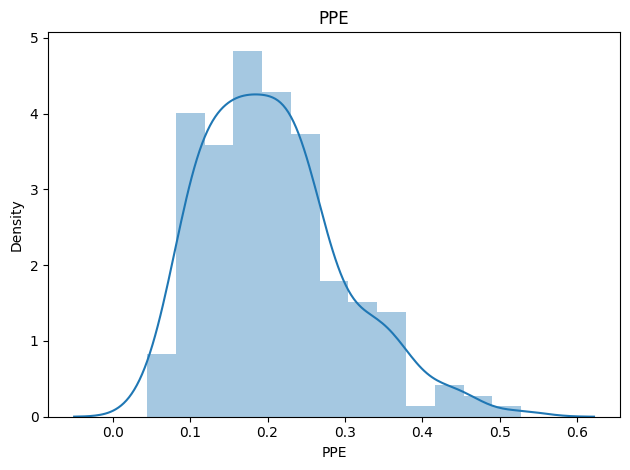

In [20]:
for i in df.columns:
    distplots(i)

### Box-plot

In [23]:
def boxplots(col):
    plt.title(col)
    sns.boxplot(x=df[col])
    plt.tight_layout()
    plt.show()

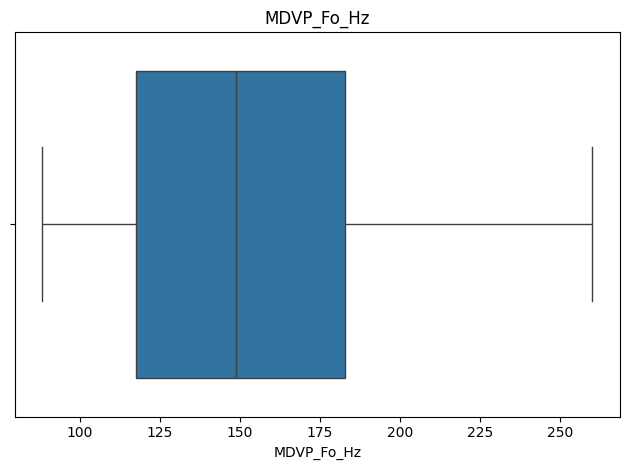

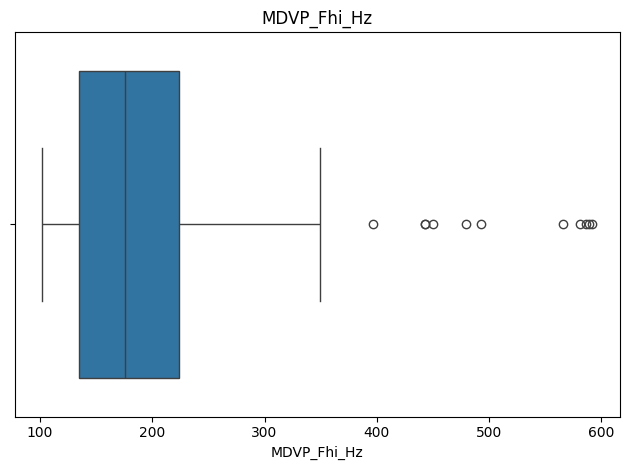

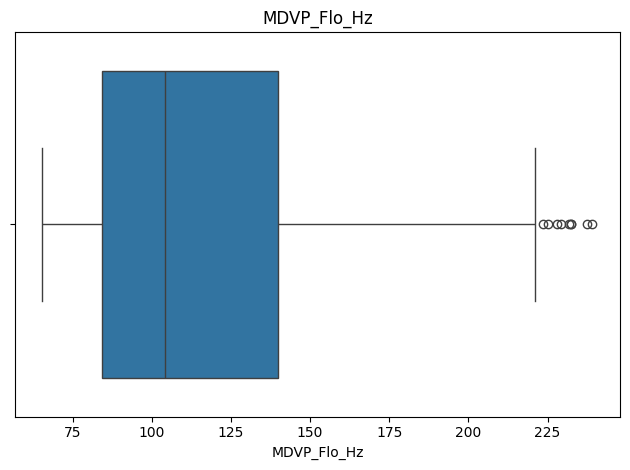

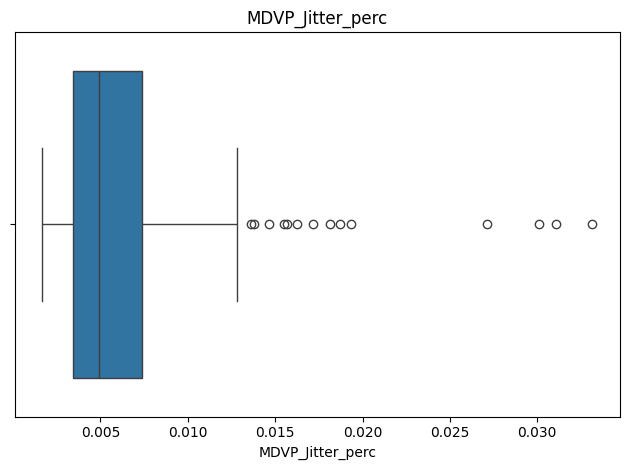

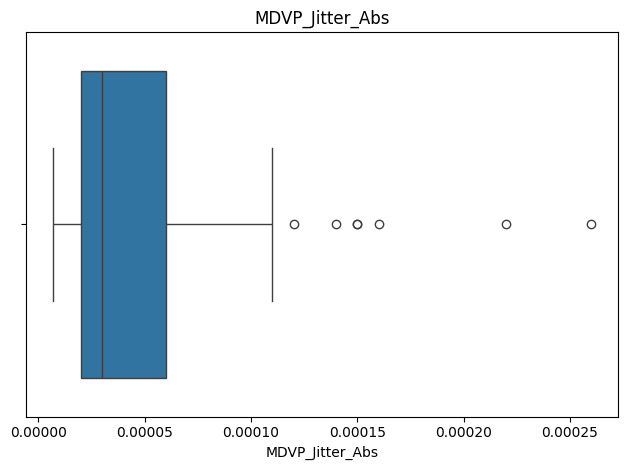

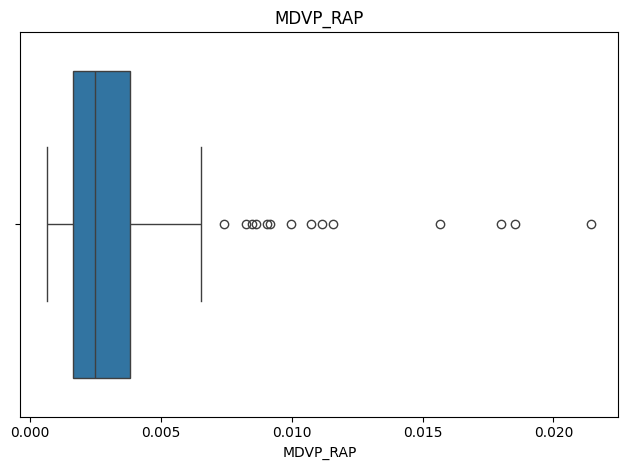

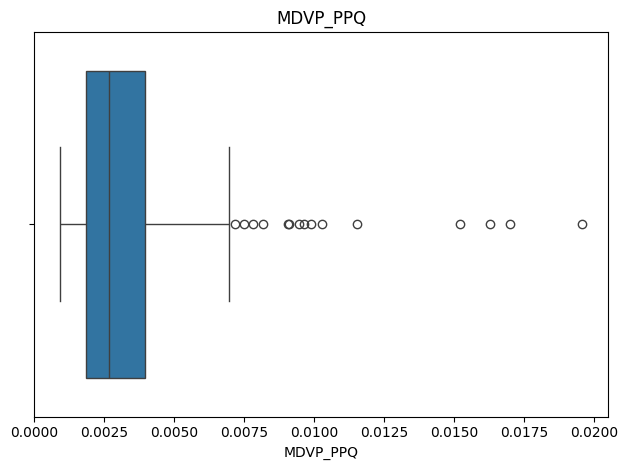

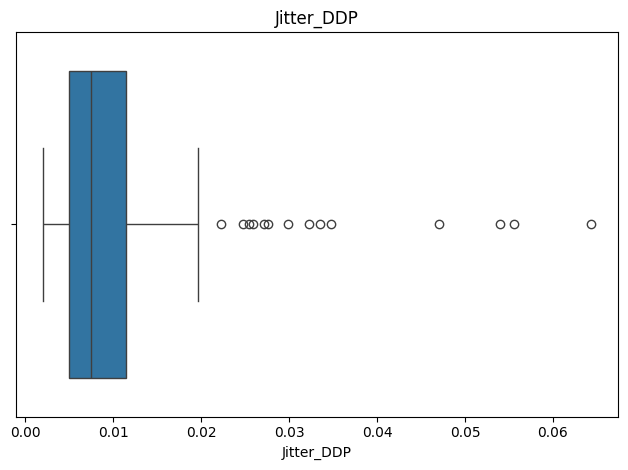

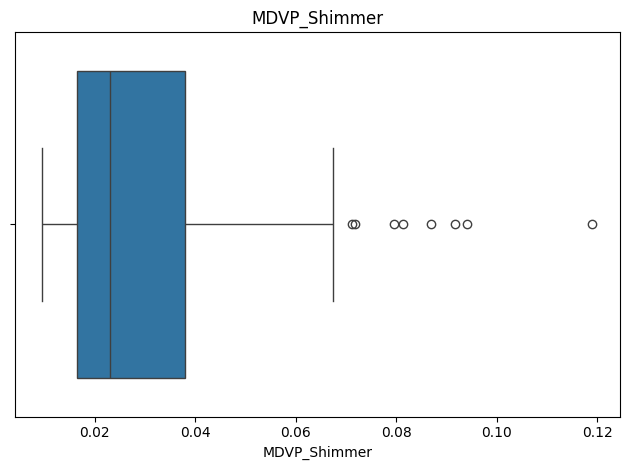

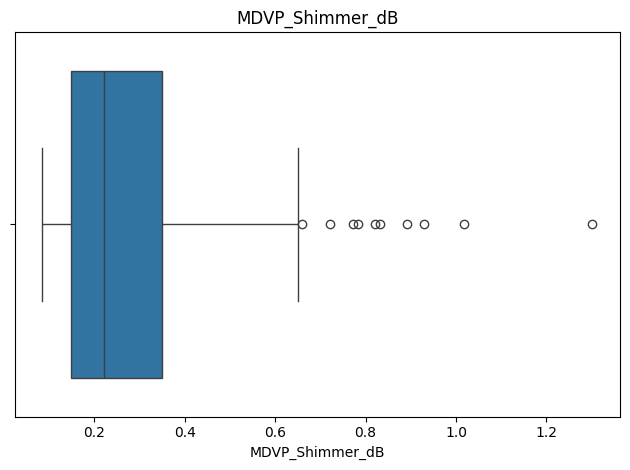

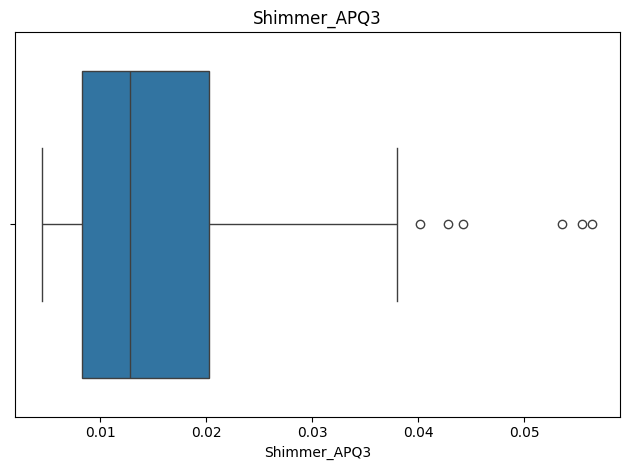

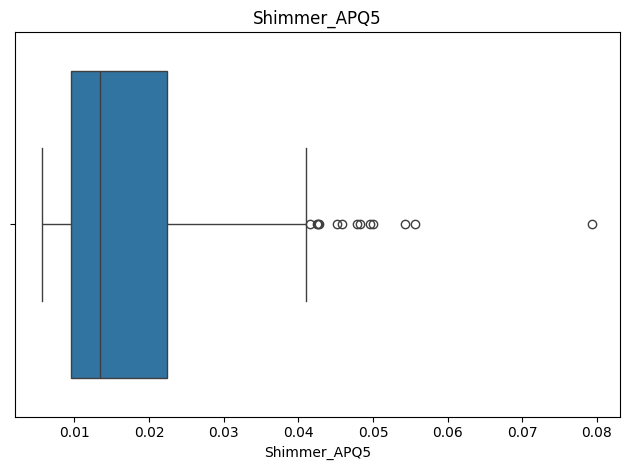

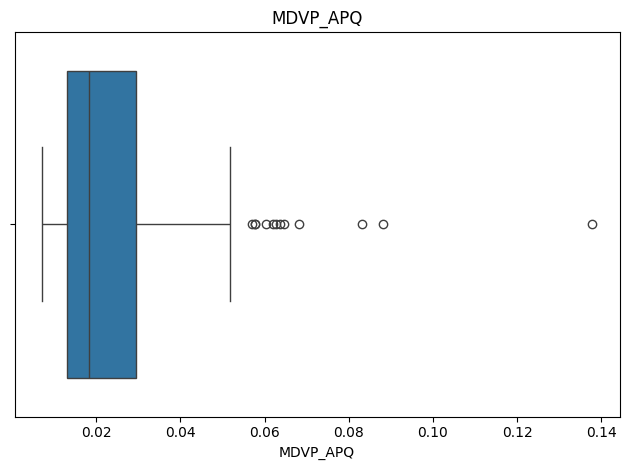

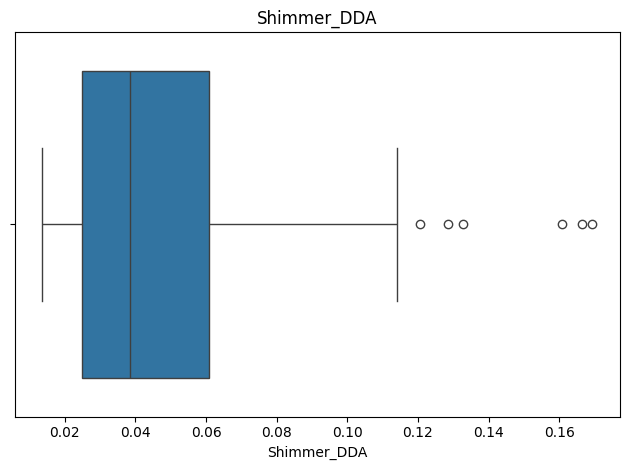

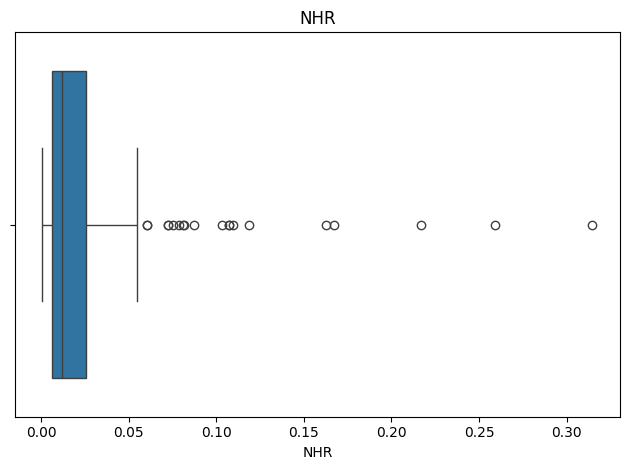

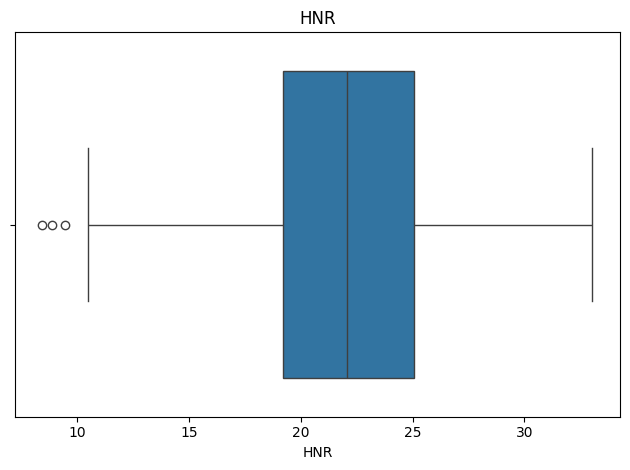

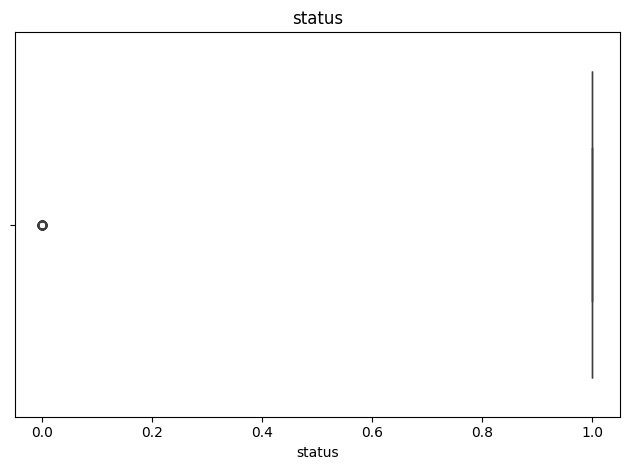

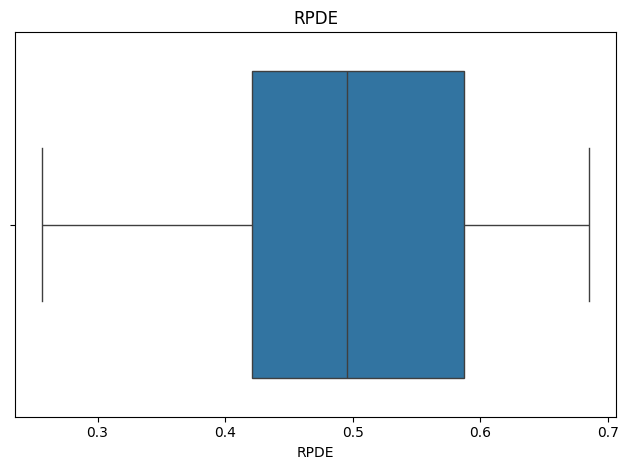

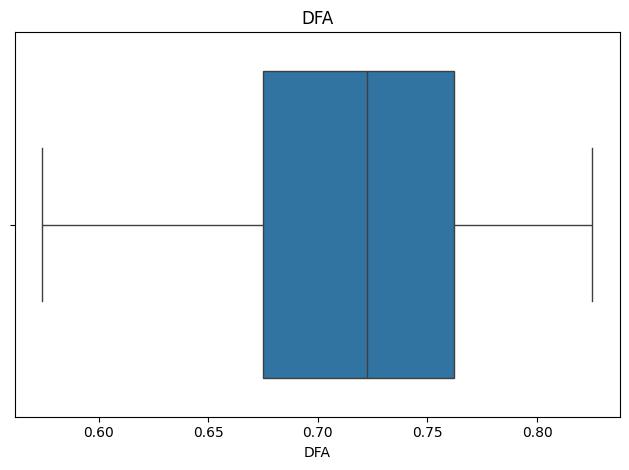

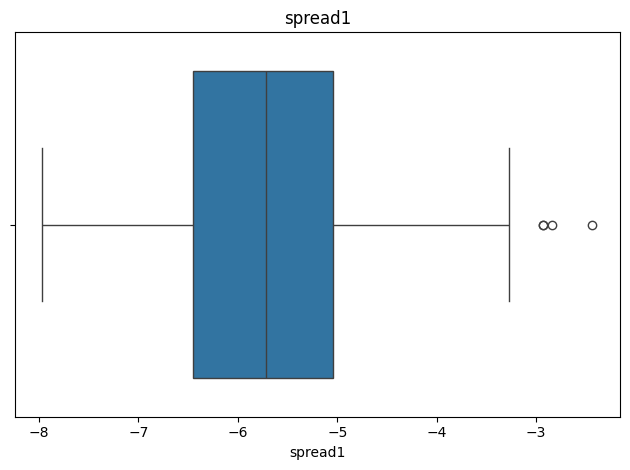

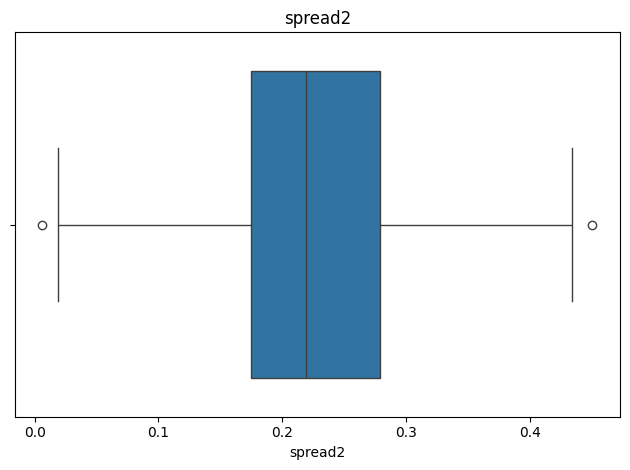

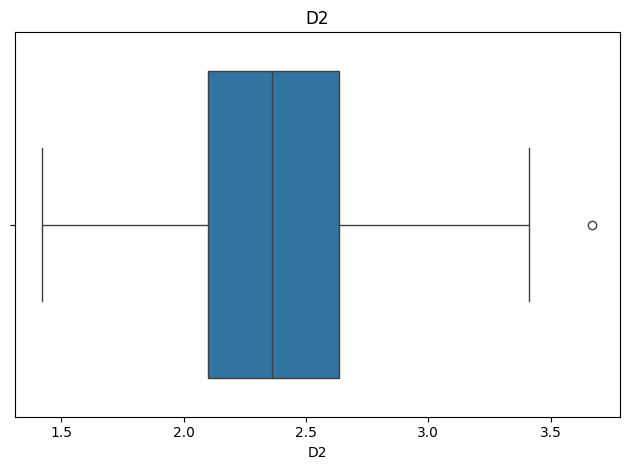

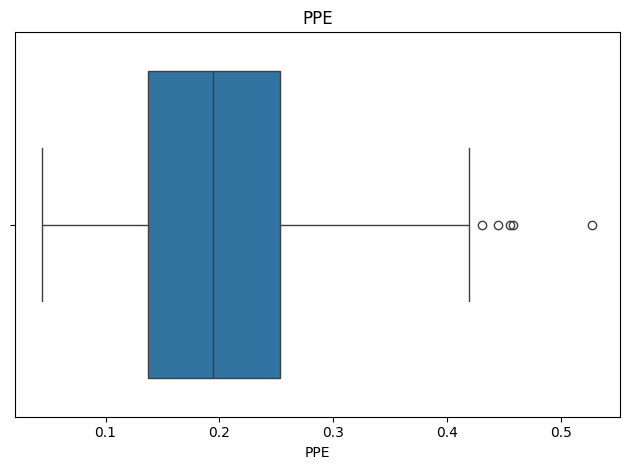

In [24]:
for i in df.columns:
    boxplots(i)

## Split the Data into Independent and Dependent variable

In [25]:
x = df.drop(columns=['status']) #Independent
y = df['status'] #Dependent

In [26]:
x.head()

,MDVP_Fo_Hz,MDVP_Fhi_Hz,MDVP_Flo_Hz,MDVP_Jitter_perc,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer_dB,...,MDVP_APQ,Shimmer_DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [29]:
y.value_counts()

status
1    147
0     48
Name: count, dtype: int64

## Classifing the Features

In [30]:
def classify_feature(x):
    categorical_feature = []
    non_categori_feature = []
    discreate_feature = []
    continus_feature = []

    for column in x.columns:
        if x[column].dtype == 'object':
            if x[column].nunique() < 3:
                categorical_feature.append(column)
            else:
                non_categori_feature.append(column)
        elif x[column].dtype in ['Int64' , 'float64']:
            if x[column].nunique() < 10:
                discreate_feature.append(column)
            else:
                continus_feature.append(column)
    
    return categorical_feature , non_categori_feature, discreate_feature , continus_feature

In [31]:
categorical , non_categorical , discreate ,containous = classify_feature(x)

In [32]:
categorical

[]

In [33]:
non_categorical

[]

In [34]:
discreate

[]

In [36]:
containous

['MDVP_Fo_Hz',
 'MDVP_Fhi_Hz',
 'MDVP_Flo_Hz',
 'MDVP_Jitter_perc',
 'MDVP_Jitter_Abs',
 'MDVP_RAP',
 'MDVP_PPQ',
 'Jitter_DDP',
 'MDVP_Shimmer',
 'MDVP_Shimmer_dB',
 'Shimmer_APQ3',
 'Shimmer_APQ5',
 'MDVP_APQ',
 'Shimmer_DDA',
 'NHR',
 'HNR',
 'RPDE',
 'DFA',
 'spread1',
 'spread2',
 'D2',
 'PPE']

## NO need for Encoding

In [38]:
x.dtypes

MDVP_Fo_Hz          float64
MDVP_Fhi_Hz         float64
MDVP_Flo_Hz         float64
MDVP_Jitter_perc    float64
MDVP_Jitter_Abs     float64
MDVP_RAP            float64
MDVP_PPQ            float64
Jitter_DDP          float64
MDVP_Shimmer        float64
MDVP_Shimmer_dB     float64
Shimmer_APQ3        float64
Shimmer_APQ5        float64
MDVP_APQ            float64
Shimmer_DDA         float64
NHR                 float64
HNR                 float64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

## Description of Data

In [39]:
x.describe()

,MDVP_Fo_Hz,MDVP_Fhi_Hz,MDVP_Flo_Hz,MDVP_Jitter_perc,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer_dB,...,MDVP_APQ,Shimmer_DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.024081,0.046993,0.024847,21.885974,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.016947,0.030459,0.040418,4.425764,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.007190,0.013640,0.000650,8.441000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.013080,0.024735,0.005925,19.198000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.018260,0.038360,0.011660,22.085000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.029400,0.060795,0.025640,25.075500,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.137780,0.169420,0.314820,33.047000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


## Imbalanced Treamtemt 

In [40]:
y.value_counts(normalize=True)

status
1    0.753846
0    0.246154
Name: proportion, dtype: float64

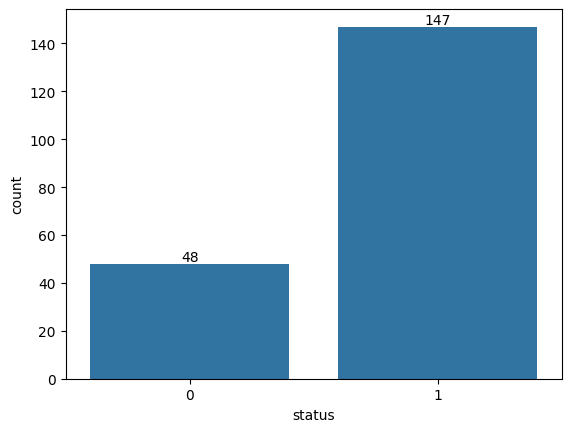

In [42]:
ax = sns.countplot(x=y)
ax.bar_label(ax.containers[0])
plt.show()

### SMOTE

In [43]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_smote , y_smote = smote.fit_resample(x,y)

In [44]:
x_smote.head()

,MDVP_Fo_Hz,MDVP_Fhi_Hz,MDVP_Flo_Hz,MDVP_Jitter_perc,MDVP_Jitter_Abs,MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer_dB,...,MDVP_APQ,Shimmer_DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [45]:
y_smote.value_counts(normalize=True)

status
1    0.5
0    0.5
Name: proportion, dtype: float64

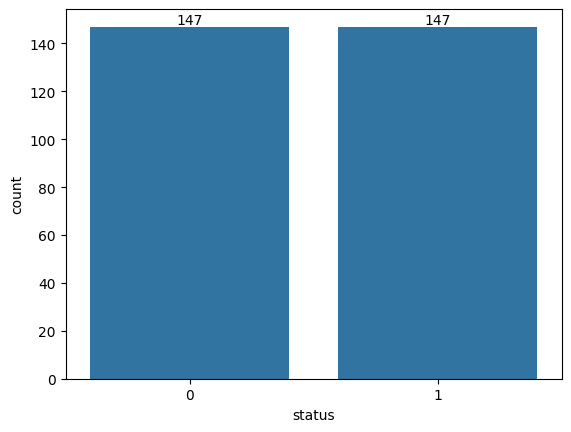

In [46]:
ax = sns.countplot(x=y_smote)
ax.bar_label(ax.containers[0])
plt.show()

### Date is Now Balanced

## Split the Data into Train and Test

In [47]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train ,y_test = train_test_split(x_smote ,y_smote , test_size=0.3  , random_state=42 , stratify=y_smote)

In [48]:
x_train.shape ,x_test.shape , y_train.shape ,y_test.shape

((205, 22), (89, 22), (205,), (89,))

## Build the Machine Learning Model 

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB 
# evaluation matrics
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

      Method Used  Accuracy
0  LogitRegession  0.797753
1           Dtree  0.966292
2         RForest  0.921348
3             XGB  0.955056
4             KNN  0.898876
5             SVM  0.685393
6             NBT  0.842697
7          Voting  0.955056
Axes(0.125,0.11;0.775x0.77)


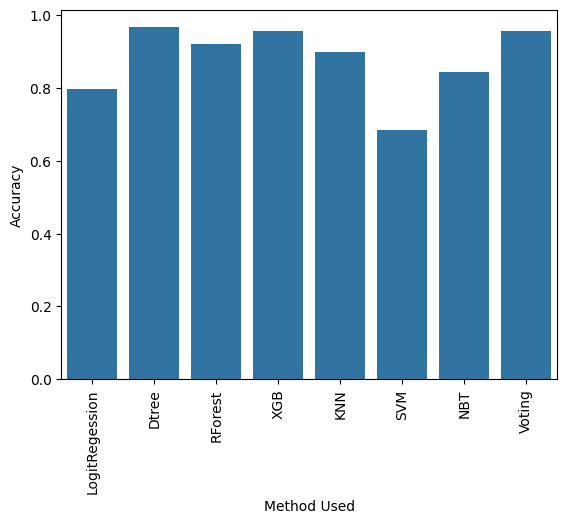

In [50]:

# LogisticRegression
logit = LogisticRegression()
logit = logit.fit(x_train, y_train)
y_pred_lr = logit.predict(x_test) 
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# DecisionTree
dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train, y_train)
y_pred_dt = dtree.predict(x_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# RandomForest
rforest = RandomForestClassifier(criterion='entropy' , n_estimators=50)
rforest = rforest.fit(x_train, y_train)
y_pred_rf = rforest.predict(x_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# XGBoost
xgboost = XGBClassifier()
xgboost = xgboost.fit(x_train, y_train)
y_pred_xg = xgboost.predict(x_test)
accuracy_xg = accuracy_score(y_test, y_pred_xg)

# KNN
knn = KNeighborsClassifier()
knn = knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
 
# SVM
svm = SVC()
svm = svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Naive Based Theorem
nbt = GaussianNB()
nbt = nbt.fit(x_train, y_train)
y_pred_nbt = nbt.predict(x_test)
accuracy_nbt = accuracy_score(y_test, y_pred_nbt)

# Voting Classifier - combining all the above model together by using voting classifier approach
model_evc = VotingClassifier(estimators = [('logit',logit), ('dtree',dtree), ('rforest',rforest),('xgboost',xgboost),
                                           ('knn',knn),('svm',svm),('nbt',nbt)])
model_evc = model_evc.fit(x_train, y_train)
pred_evc = model_evc.predict(x_test)
accuracy_evc = accuracy_score(y_test, pred_evc)

list1 = ['LogitRegession','Dtree','RForest','XGB','KNN','SVM','NBT','Voting']
list2 = [accuracy_lr,accuracy_dt,accuracy_rf,accuracy_xg,accuracy_knn,accuracy_svm,accuracy_nbt,accuracy_evc]
list3 = [logit,dtree,rforest,xgboost,knn,svm,nbt,model_evc]

df_accuracy = pd.DataFrame({"Method Used":list1, "Accuracy":list2})

print(df_accuracy)

chart = sns.barplot(x="Method Used", y="Accuracy", data=df_accuracy)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
print(chart)                          
                               

### Observation 
- Voting giving more accurate result

## Check underfitting and overfitting problem (high bias or high variance problem)- Bias-Variance Trade off

In [51]:
pred_evc_train = model_evc.predict(x_train)
pred_evc_test = model_evc.predict(x_test)
accuracy_evc_train = accuracy_score(y_train, pred_evc_train)
accuracy_evc_test = accuracy_score(y_test, pred_evc_test)

print("************************")
print("Training Accuracy :",accuracy_evc_train)
print("************************")
print("Test Accuracy :",accuracy_evc_test)

************************
Training Accuracy : 0.9951219512195122
************************
Test Accuracy : 0.9550561797752809


## Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score
training = cross_val_score(model_evc , x_train , y_train , cv=10)

In [53]:
training.mean()

0.9466666666666667

## Evaluation Matric

In [54]:
from sklearn.metrics import classification_report , confusion_matrix
print("************************")
print("Training :",classification_report(y_train, pred_evc_train))
print("************************")
print("Test :",classification_report(y_test, pred_evc_test))

************************
Training :               precision    recall  f1-score   support

           0       0.99      1.00      1.00       102
           1       1.00      0.99      1.00       103

    accuracy                           1.00       205
   macro avg       1.00      1.00      1.00       205
weighted avg       1.00      1.00      1.00       205

************************
Test :               precision    recall  f1-score   support

           0       0.94      0.98      0.96        45
           1       0.98      0.93      0.95        44

    accuracy                           0.96        89
   macro avg       0.96      0.95      0.96        89
weighted avg       0.96      0.96      0.96        89



In [55]:
print('Train')
print(confusion_matrix(y_train, pred_evc_train))
print()
print("Test")
print(confusion_matrix(y_test, pred_evc_test))

Train
[[102   0]
 [  1 102]]

Test
[[44  1]
 [ 3 41]]


## Deployment 

In [ ]:
# import pickle
# pickle_out = open("Parkinosis_classifer.pkl" , "wb")
# pickle.dump(model_evc ,pickle_out)
# pickle_out.close()